# **Task 1: Create a bar chart or histogram to visualize the distribution on  categoricsl or continuous variable, such as the distribution of ages or genders in a population.**

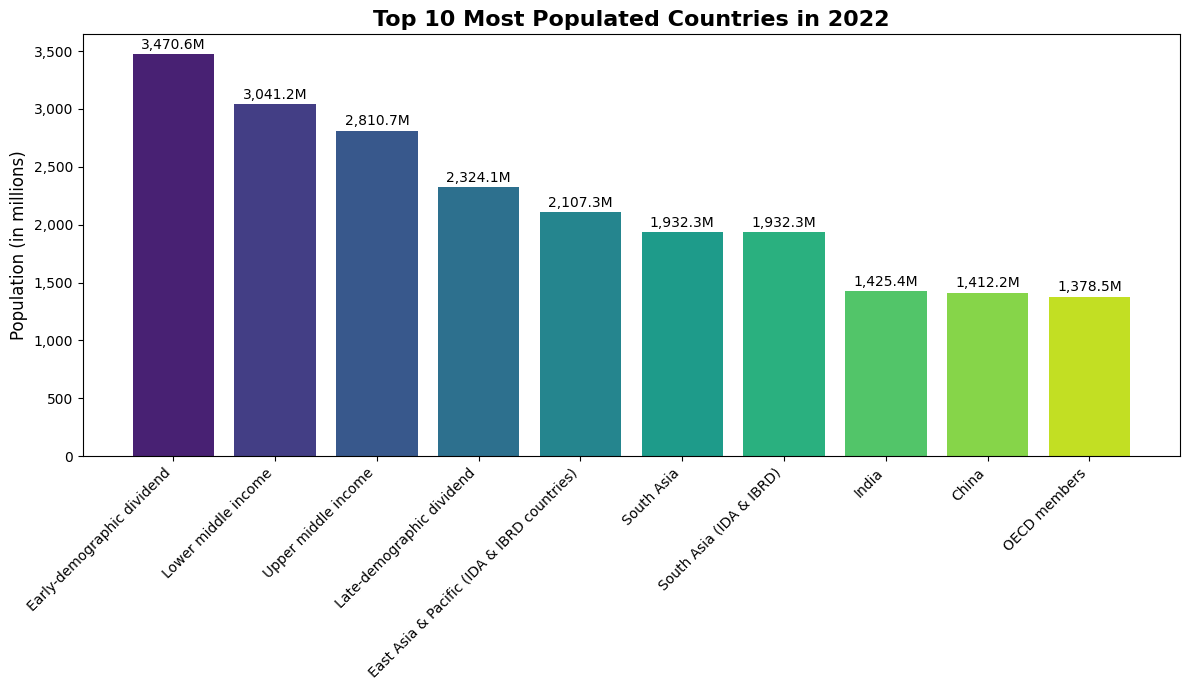

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

df = pd.read_csv("/content/Population.csv", skiprows=4)

# Exclude aggregates (non-country entries) based on Country Code
aggregate_codes = [
    'WLD', 'LMY', 'MIC', 'HIC', 'LIC', 'IBT', 'IDA', 'IBD',
    'EAS', 'EAP', 'LCN', 'MEA', 'SSF', 'SAR', 'ECS', 'NAC'
]
df = df[~df['Country Code'].isin(aggregate_codes)]

# Filter for 2022 data and drop missing values
df_2022 = df[['Country Name', '2022']].dropna()

# Sort and get top 10 countries by population
top10 = df_2022.sort_values(by='2022', ascending=False).head(10)

# Prepare data for plotting
countries = top10['Country Name']
populations = top10['2022'] / 1e6  # Convert to millions

# Plotting
plt.figure(figsize=(12, 7))
colors = sns.color_palette("viridis", len(countries))
bars = plt.bar(countries, populations, color=colors)

# Annotate values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20,
             f'{height:,.1f}M', ha='center', va='bottom', fontsize=10)

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Customize chart
plt.title('Top 10 Most Populated Countries in 2022', fontsize=16, weight='bold')
plt.ylabel('Population (in millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show
plt.savefig("top10_population_2022.png", dpi=300)
plt.show()
